# MNIST

## Fast_launch(imports, DataBunch, variables)

In [2]:
from fastai.basics import *
%matplotlib inline
data_dir = Path('data/mnist_perso')
with gzip.open(data_dir/'mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
n,c = x_train.shape
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)
loss_func = nn.CrossEntropyLoss()
lr = 1e-3

In [3]:
y_train.shape

torch.Size([50000])

## Rewrite nn.Linear func

In [4]:
from torch.nn.parameter import Parameter

In [10]:
class NNlinear(nn.Module):
    """
    Créate layer of weights and bias
    """
    def __init__(self, in_size, out_size, bias:bool=True):
        super().__init__()
        self.in_size = in_size
        self.out_size = out_size
        self.has_bias = bias
        
        self.weights = Parameter(torch.rand((out_size, in_size), requires_grad=True))
        
        if self.has_bias:
            self.bias = Parameter(torch.ones((out_size), requires_grad=True))
    
    def forward(self, xb):
        print(self.weights.type(), self.bias.type(), xb.type())
        if self.has_bias:
            return F.linear(xb, self.weights, self.bias)
        else:
            return F.linear(xb, self.weights)

In [6]:
class Mnist_Logistic2(nn.Module):
    """
    Créates neural network class with a single linear layer
    """
    def __init__(self):
        super().__init__() #load nn.Module init
        self.lin = NNlinear(784, 10, bias=True)
        
    def forward(self, xb):
        return self.lin(xb)

## Rewrite Adam optim

In [7]:
class Adam():
    
    '''
    Creates an object that keeps track of the previous update vectors with dict "old"
    and process back-propagation with "step" func
    
    mom : momentum factor (same for u and v) 
    lr: learnning rate
    old: dict of previous updates for each parameters
    
    '''
    
    def __init__(self, mom, lr):
        
        self.mom = mom
        self.lr = lr
        
        self.old = dict()
        for p in model.parameters():
            self.old[p] = 2*[torch.zeros(0, device='cuda:0')]
    
    def step(self):
        with torch.no_grad():
            for p in model.parameters():
                if torch.equal(self.old[p][0], torch.zeros(0,device='cuda:0')):
                    # Regulad SGD
                    u = p.grad
                    v = torch.ones(p.shape, device='cuda:0')
                else:
                    # Adam
                    u = p.grad * (1-self.mom) + self.old[p][0] * self.mom
                    v = p.grad**2 * (1-self.mom) + self.old[p][1] * self.mom
                    
                self.old[p][0] = u
                self.old[p][1] = v
                
                p.sub_(self.lr * u * v**(-.5))
                p.grad.zero_()
                
                

In [8]:
def update(x,y, optim):
    y_hat = model(x)
    
    wd = 1e-5
    w2 = 0.
    for p in model.parameters():
        w2 += (p**2).sum()
    
    loss = loss_func(y_hat, y) + wd*w2
    loss.backward()
    
    optim.step()
    
    return loss.item()
    

torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.

torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.

torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.

torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.

torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.FloatTensor torch.cuda.FloatTensor
torch.cuda.FloatTensor torch.cuda.

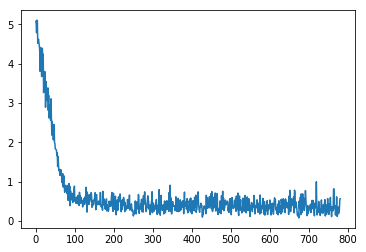

In [11]:
model = Mnist_Logistic2().cuda()

adam_optim = Adam(.9, 1e-2)

losses = [ update(x,y,adam_optim) for x,y in data.train_dl ]

plt.plot(losses)
